In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

## Task 1: Problem Statement : understand data and variables. define problem statement and ML flow.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data= pd.read_csv("https://archive.ics.uci.edu/static/public/2/data.csv")

In [7]:
data.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [7]:
X.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
for f in X:
     print(f"{f}: {data[f].nunique()}")
     print(data[f].value_counts())

age: 74
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
workclass: 9
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
fnlwgt: 28523
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64
education: 16
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th  

### Problem Statement -
Using census data, create a binary classification model that predicts whether an individual's income exceeds $50K/year.

1. Data Collection
        ↓
2. Data Cleaning
        ↓
3. Exploratory Data Analysis (EDA)
        ↓
4. Feature Engineering
        ↓
5. Data Splitting (Train/Test)
        ↓
6. Model Selection
        ↓
7. Model Training
        ↓
8. Model Evaluation
        ↓
9. Hyperparameter Tuning
        ↓
10. Final Testing
        ↓
11. Deployment

In [10]:
# Marking Duplicate records
data['is_duplicate'] = data.duplicated(keep=False)  
duplicates = data[data['is_duplicate'] == True]

duplicates.sort_values(by=['age','fnlwgt'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,is_duplicate
36461,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.,True
48521,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.,True
17673,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K,True
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K,True
15189,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K,True
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K,True
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K,True
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K,True


In [11]:
data['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [12]:
# Let's fix this issue and replace the values with suffix '.' with no dots one
data['income'] = data['income'].replace({'<=50K.': '<=50K','>50K.': '>50K'})

# Task 3: 
### Define Hypothesis statements 

In statistics and machine learning, a hypothesis statement is an assumption you make about a population or dataset that you want to test with data.
There are usually two main types 

1. Null Hypothesis (H₀)
    This is the default assumption — it states that nothing is happening or there's no effect.
    Think of it as the “no change” or “status quo”.

 Example:
    "There is no difference in income between men and w omen."

2. Alternative Hypothesis (H₁ or Ha)
    This is what you believe might be true instead of the null.
    It's the opposite of the null hypothesis.

Example:
"There is a difference in income between me n and women."

Why Are Hypo                                                                                                                             theses Important?
    They're used in statistical testing to:
    Determine whether an observed effect (e.g., higher income) is real or due to chance.
    Guide decision-making in research, product testing, or policy.

## Task 4 : Statistical Tests
##### Perform statistical tests to validate hypotheses or check for significant differences between groups.
##### Explain Hypothesis Testing and p-value.What are type 1 and Type 2 errors?and 
##### apply Statistical test on generated hypothesis

| **Concept**             | **Symbol** | **Meaning**                                                        | **Typical Value**    |
|-------------------------|------------|---------------------------------------------------------------------|----------------------|
| Null Hypothesis         | H₀         | Assumes no effect or difference                                    | —                    |
| Alternative Hypothesis  | H₁         | Assumes there is an effect or difference                           | —                    |
| Significance Level      | α (alpha)  | Probability of making a Type I error (rejecting H₀ when true)      | 0.05 (5%)            |
| Confidence Level        | 1 − α      | Confidence in the test results                                     | 0.95 (95%)           |
| Power of Test           | 1 − β      | Probability of correctly rejecting H₀ (detecting real effect)      | ≥ 0.80 (80%)         |
| Type I Error            | α          | False positive (reject H₀, but H₀ is true)                         | ≤ 0.05               |
| Type II Error           | β          | False negative (fail to reject H₀, but H₁ is true)                | ≤ 0.20               |
| p-value                 | p          | Probability of obtaining the observed result if H₀ is true         | Computed from test   |


## Hypothesis Testing:

##### Z Proprtion Test : 
A one-proportion z-test is a statistical test used to compare the proportion of a sample to a known population proportion. It is used to test a hypothesis about the population proportion and is based on the assumption that the sample is drawn from a population with a normal distribution

In [40]:
# Let's check the income distribution in the given sample dataset
income_cnt = data['income'].value_counts(normalize=True) * 100

print("Income Distribution (%):\n",income_cnt.round(2))

Income Distribution (%):
 income
<=50K     50.61
<=50K.    25.46
>50K      16.05
>50K.      7.87
Name: proportion, dtype: float64


To validate whether the observed proportion of individuals earning more than $50K in the sample is significantly different from a hypothesized population proportion, we are using a **z proportion test**. 

A hypothesis test for a proportion is used when you are **comparing one group to a known or hypothesized population proportion value**. The population proportion of individuals earning >$50K is assumed to be 25% (i.e., 0.25).

There is a rule stating that **if $n*p \ge 10 and $n*(1-p) \ge 10, then the distribution of sample proportions is approximately normal and can be estimated using the normal distribution, i.e., using the z - statistic**. 

As **the condition in the rule is satisfied for our case study**, we can use the normal distribution for the proportion test.

**Null hypothesis $(H_0): π = .25**

**Alternative $(H_a): π < .25**

* count: The number of successes in trials / observations
* nobs: The total number of trials / observations
* value: The value of the null hypothesis (proportion)

Z-statistic: -53.857, p-value: 0.000
Critical value (zα): 1.645


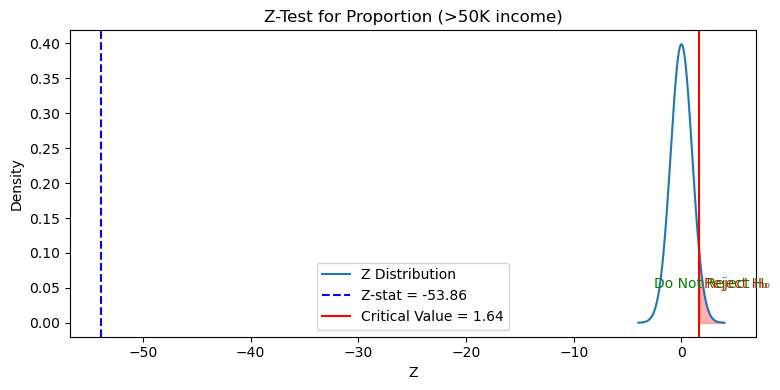

In [52]:
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

success = sum(data['income'] == '>50K')
n = len(data)
p0 = 0.25  # Hypothesized proportion: Considering this percentage based of the sample dataset.

# Z-Test
z_stat, p_val = proportions_ztest(count=success, nobs=n, value=p0)
alpha = 0.05
critical_val = norm.ppf(1 - alpha)

# Output
print(f"Z-statistic: {z_stat:.3f}, p-value: {p_val:.3f}")
print(f"Critical value (zα): {critical_val:.3f}")

# Plot Z distribution
x = np.linspace(-4, 4, 200)
y = norm.pdf(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Z Distribution')
plt.axvline(x=z_stat, color='blue', linestyle='--', label=f'Z-stat = {z_stat:.2f}')
plt.axvline(x=critical_val, color='red', linestyle='-', label=f'Critical Value = {critical_val:.2f}')

# Shading rejection region
x_shade = np.linspace(critical_val, 4, 100)
plt.fill_between(x_shade, norm.pdf(x_shade), color='red', alpha=0.3)

plt.annotate('Reject H₀', xy=(critical_val + 0.5, 0.05), color='red')
plt.annotate('Do Not Reject H₀', xy=(-2.5, 0.05), color='green')
plt.title("Z-Test for Proportion (>50K income)")
plt.xlabel("Z")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


Definition:
Z-statistic: How many standard deviations is the sample proportion (or mean) from the hypothesized population value?
             Here the Z value of -5.552 means that the sample result is 5.552 standard deviations below the expected value under the null hypothesis.
p-Value: A p-value of 0.000 (<5% alpha) implies powerful evidence against the null hypothesis.
zalpha: the critical value varies between +-1.64  so any z-statistic value outside this region will reject the Null hypothesis.
        As -5.552 is not falling between the zalpha region, we have enough evidence to reject the Null Hypothesis.

####
### As we have categorical data involved, its better to perform chi-square test.
####


🔍 Feature: workclass
  Chi-Square Statistic: 2451.936
  Degrees of Freedom: 24
  Critical Value (χ²α): 36.415
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


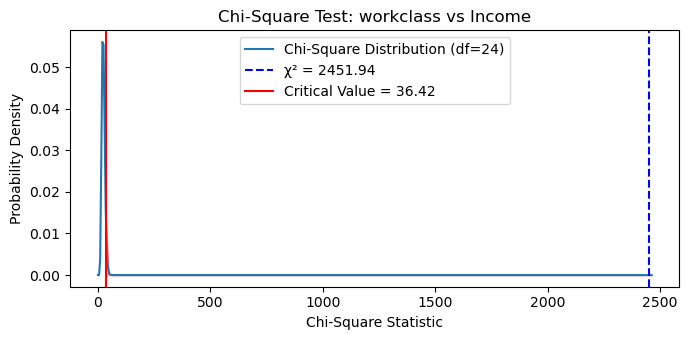


🔍 Feature: education
  Chi-Square Statistic: 6565.748
  Degrees of Freedom: 45
  Critical Value (χ²α): 61.656
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


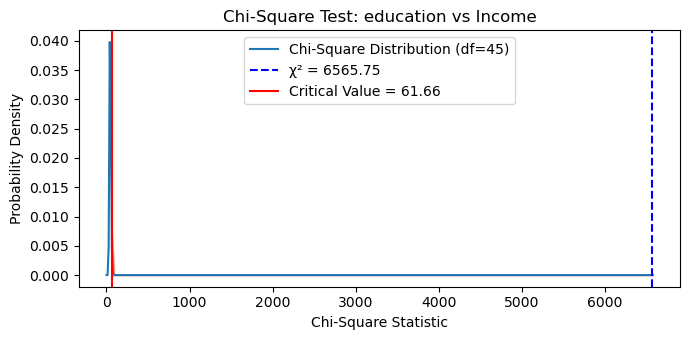


🔍 Feature: marital-status
  Chi-Square Statistic: 9821.002
  Degrees of Freedom: 18
  Critical Value (χ²α): 28.869
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


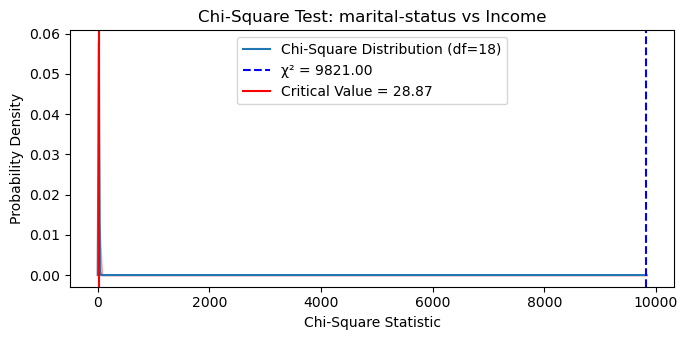


🔍 Feature: occupation
  Chi-Square Statistic: 6804.762
  Degrees of Freedom: 42
  Critical Value (χ²α): 58.124
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


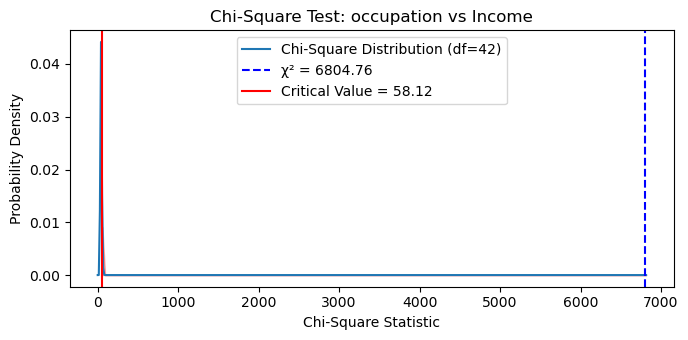


🔍 Feature: relationship
  Chi-Square Statistic: 10097.379
  Degrees of Freedom: 15
  Critical Value (χ²α): 24.996
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


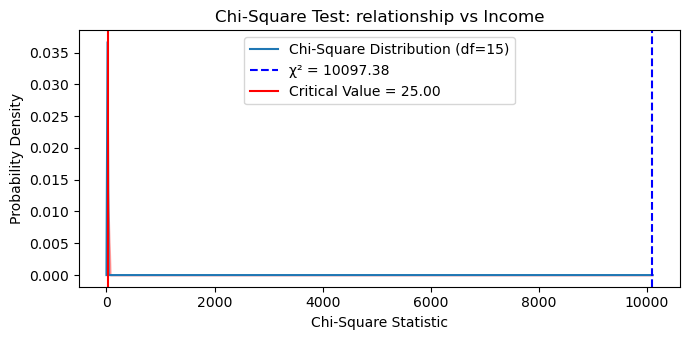


🔍 Feature: race
  Chi-Square Statistic: 494.407
  Degrees of Freedom: 12
  Critical Value (χ²α): 21.026
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


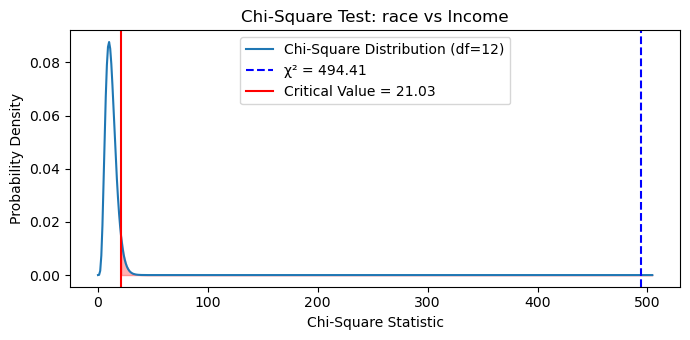


🔍 Feature: sex
  Chi-Square Statistic: 2250.032
  Degrees of Freedom: 3
  Critical Value (χ²α): 7.815
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


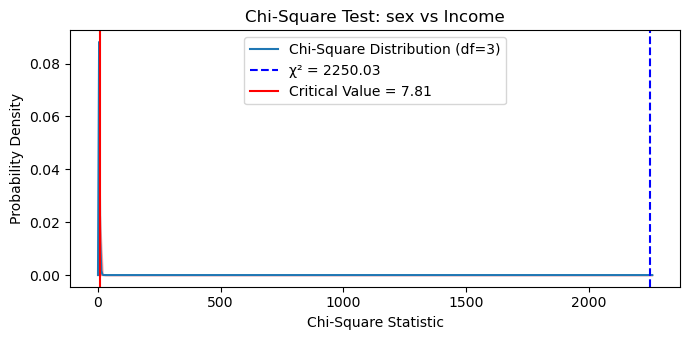


🔍 Feature: native-country
  Chi-Square Statistic: 814.256
  Degrees of Freedom: 123
  Critical Value (χ²α): 149.885
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


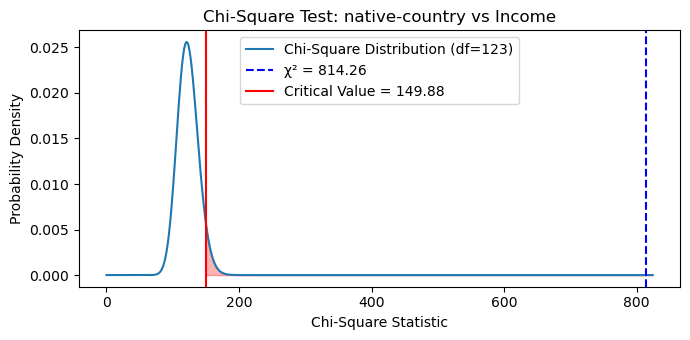


🔍 Feature: income
  Chi-Square Statistic: 146526.000
  Degrees of Freedom: 9
  Critical Value (χ²α): 16.919
  p-value: 0.000
  ❌ Reject Null Hypothesis → Significant association with income


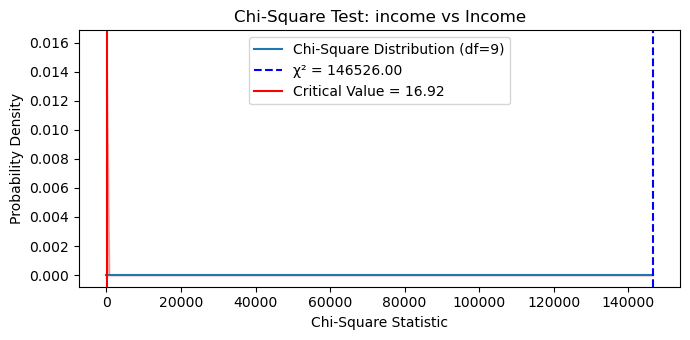

In [54]:
from scipy.stats import chi2_contingency, chi2

cat_cals = data.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_cals:
    print(f"\n🔍 Feature: {col}")

    # Create contingency table
    contingency_table = pd.crosstab(data[col], data['income'])

    # Perform Chi-Square Test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Compute critical value
    critical_val = chi2.ppf(1 - alpha, dof)

    # Print results
    print(f"  Chi-Square Statistic: {chi2_stat:.3f}")
    print(f"  Degrees of Freedom: {dof}")
    print(f"  Critical Value (χ²α): {critical_val:.3f}")
    print(f"  p-value: {p_val:.3f}")
    
    if chi2_stat > critical_val:
        print("  ❌ Reject Null Hypothesis → Significant association with income")
    else:
        print("  ✅ Do Not Reject Null → Likely independent of income")

    # Plotting the chi-square distribution
    x = np.linspace(0, chi2_stat + 10, 500)
    y = chi2.pdf(x, df=dof)

    plt.figure(figsize=(7, 3.5))
    plt.plot(x, y, label=f'Chi-Square Distribution (df={dof})')
    plt.axvline(chi2_stat, color='blue', linestyle='--', label=f'χ² = {chi2_stat:.2f}')
    plt.axvline(critical_val, color='red', linestyle='-', label=f'Critical Value = {critical_val:.2f}')

    # Shade rejection region
    x_shade = np.linspace(critical_val, x.max(), 200)
    plt.fill_between(x_shade, chi2.pdf(x_shade, df=dof), color='red', alpha=0.3)

    plt.title(f"Chi-Square Test: {col} vs Income")
    plt.xlabel("Chi-Square Statistic")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


🔍 Feature: age
  t-statistic: 48.601
  Degrees of Freedom (approx): 7840
  Critical Value (±tα/2): ±1.960
  p-value: 0.000
  ❌ Reject Null Hypothesis → Means differ significantly by income


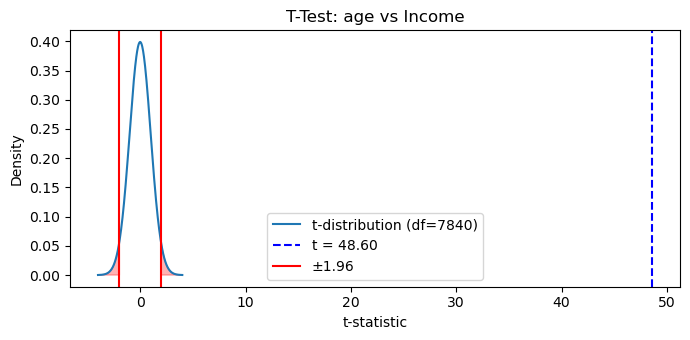


🔍 Feature: fnlwgt
  t-statistic: -1.555
  Degrees of Freedom (approx): 7840
  Critical Value (±tα/2): ±1.960
  p-value: 0.120
  ✅ Do Not Reject Null → No significant mean difference


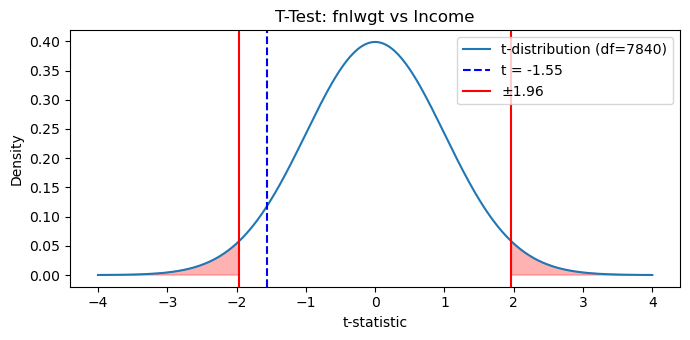


🔍 Feature: capital-gain
  t-statistic: 20.969
  Degrees of Freedom (approx): 7840
  Critical Value (±tα/2): ±1.960
  p-value: 0.000
  ❌ Reject Null Hypothesis → Means differ significantly by income


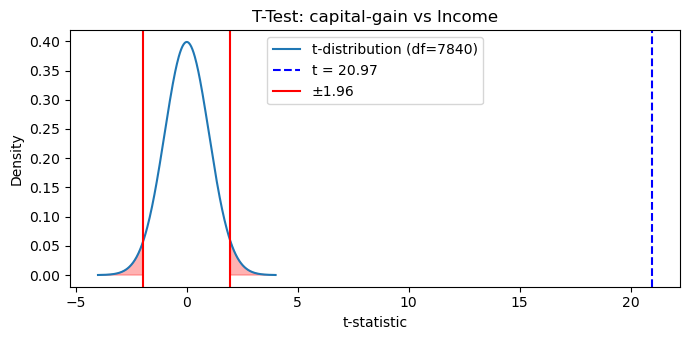


🔍 Feature: capital-loss
  t-statistic: 18.440
  Degrees of Freedom (approx): 7840
  Critical Value (±tα/2): ±1.960
  p-value: 0.000
  ❌ Reject Null Hypothesis → Means differ significantly by income


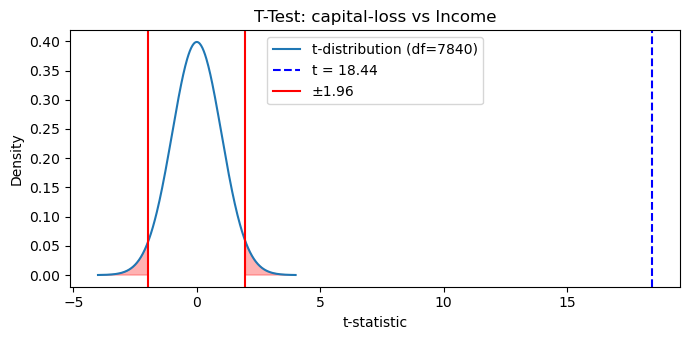


🔍 Feature: hours-per-week
  t-statistic: 43.396
  Degrees of Freedom (approx): 7840
  Critical Value (±tα/2): ±1.960
  p-value: 0.000
  ❌ Reject Null Hypothesis → Means differ significantly by income


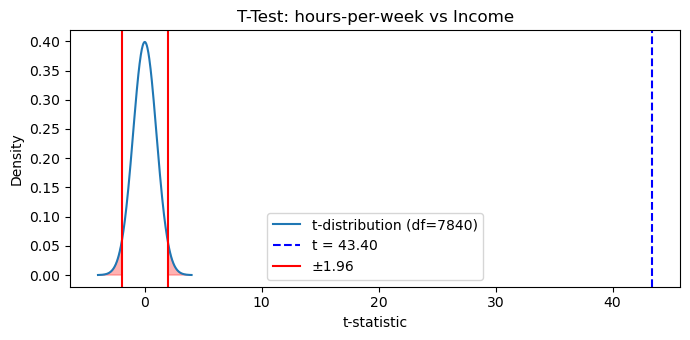

In [56]:
from scipy.stats import ttest_ind, t

# Step 1: Create a binary column for income
data['income_bin'] = (data['income'] == '>50K').astype(int)

# Step 2: Identify numerical columns (excluding some columns)
num_cols = data.select_dtypes(include=[np.number]).columns
exclude_cols = ['income_bin', 'income_num', 'education-num']
num_cols = [col for col in num_cols if col not in exclude_cols]

# Step 3: T-test for each numerical feature

for col in num_cols:
    group1 = data[data['income_bin'] == 1][col].dropna()
    group2 = data[data['income_bin'] == 0][col].dropna()

    # Perform Welch's t-test
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    df = min(len(group1), len(group2)) - 1
    critical_val = t.ppf(1 - alpha / 2, df)

    # Print results
    print(f"\n🔍 Feature: {col}")
    print(f"  t-statistic: {t_stat:.3f}")
    print(f"  Degrees of Freedom (approx): {df}")
    print(f"  Critical Value (±tα/2): ±{critical_val:.3f}")
    print(f"  p-value: {p_val:.3f}")

    if abs(t_stat) > critical_val:
        print("  ❌ Reject Null Hypothesis → Means differ significantly by income")
    else:
        print("  ✅ Do Not Reject Null → No significant mean difference")

    # Plot t-distribution with rejection regions
    x = np.linspace(-4, 4, 300)
    y = t.pdf(x, df=df)

    plt.figure(figsize=(7, 3.5))
    plt.plot(x, y, label=f't-distribution (df={df})')
    plt.axvline(t_stat, color='blue', linestyle='--', label=f't = {t_stat:.2f}')
    plt.axvline(critical_val, color='red', linestyle='-', label=f'±{critical_val:.2f}')
    plt.axvline(-critical_val, color='red', linestyle='-')
    plt.fill_between(x, y, where=(x < -critical_val) | (x > critical_val), color='red', alpha=0.3)

    plt.title(f"T-Test: {col} vs Income")
    plt.xlabel("t-statistic")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


##  Considering all the features affecting Y. Let's check their correlation using Heatmap.

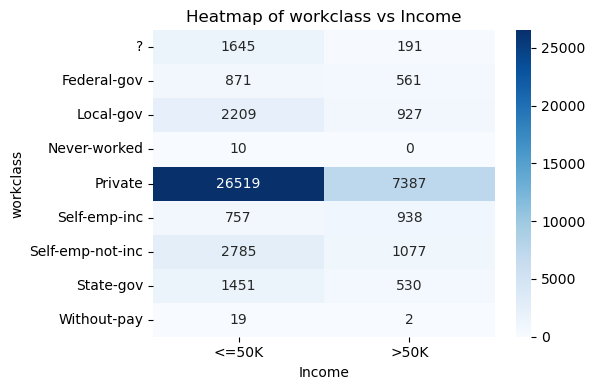

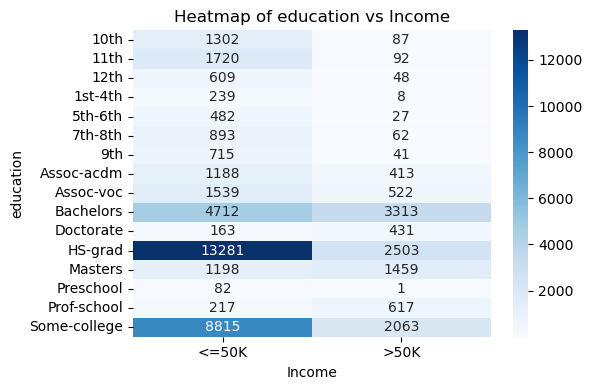

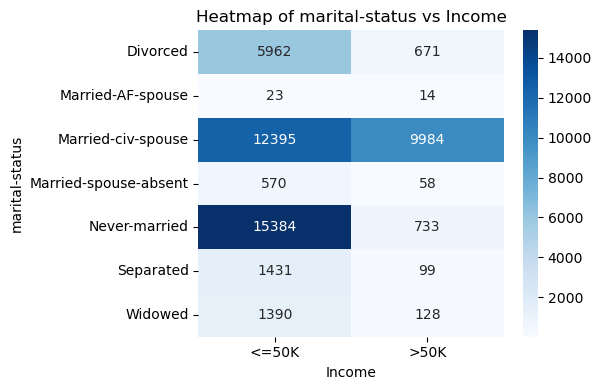

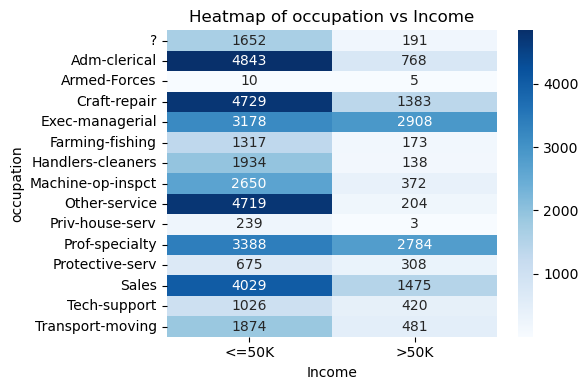

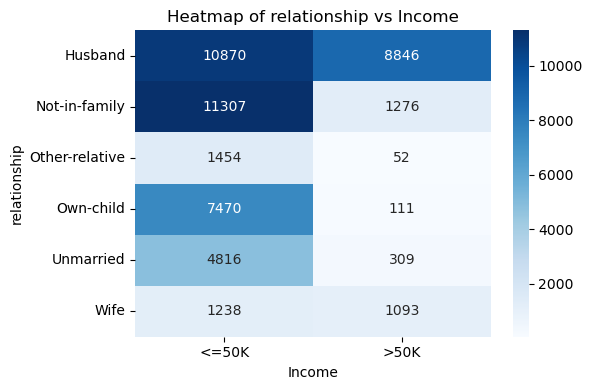

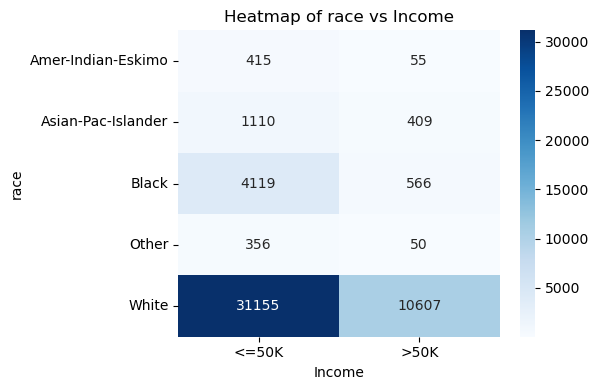

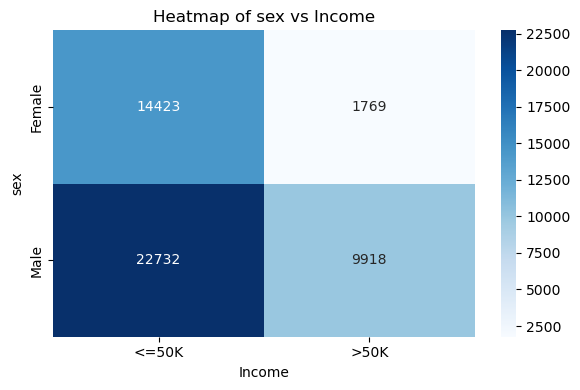

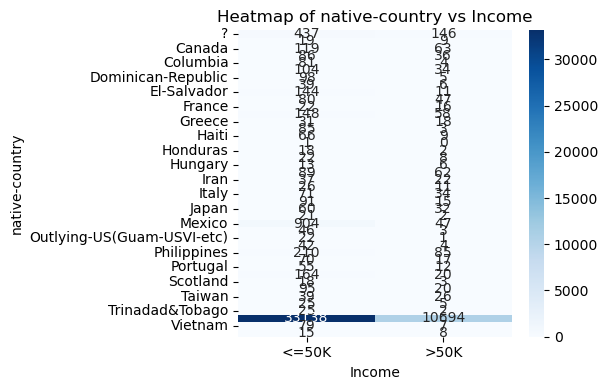

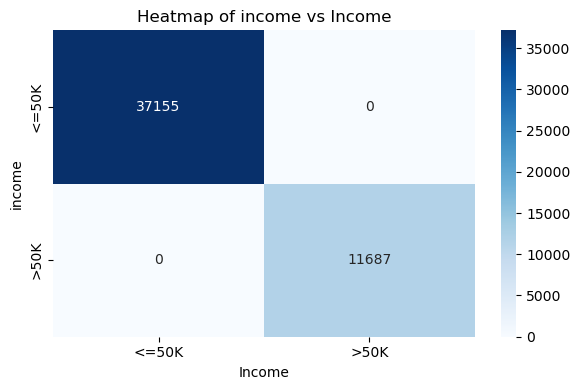

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cals = data.select_dtypes(include=['object','category']).columns.tolist()
for col in cat_cals:
    contingency = pd.crosstab(data[col], data['income'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Heatmap of {col} vs Income")
    plt.ylabel(col)
    plt.xlabel("Income")
    plt.tight_layout()
    plt.show()

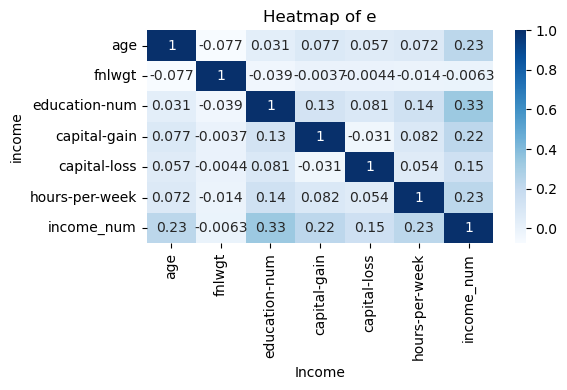

In [14]:
# Add income_num column  to have a numeric column
data['income_num'] = data['income'].map({'<=50K': 0, '>50K': 1})

num_cols = data.select_dtypes(include=['number']).columns
plt.figure(figsize=(6, 4))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='Blues')
plt.title(f"Heatmap of e")
plt.ylabel(col)
plt.xlabel("Income")
plt.tight_layout()
plt.show()

It is clear from above heatmaps that feature 'fnlwgt' is not related/impacting to the outcome "Income". So, we can ignore it and perform hypothesis testing using other features


## Task 5 : Data Cleaning
### Handle missing values by either removing rows or filling them with appropriate values (mean, median, mode, etc.). Correct data types if needed. Address any outliers or anomalies.    

In [86]:
data.shape

(48842, 15)

In [66]:
data.duplicated().sum()

29

In [88]:
cleaned_df=data.copy()

In [92]:
# Removing Duplicate records
cleaned_df =data.drop_duplicates()

In [96]:
cleaned_df.shape

(48813, 15)

In [ ]:
# Filling null values with 'unknown'
cols_to_fill = ['workclass', 'occupation', 'native-country']
cleaned_df[cols_to_fill] = cleaned_df[cols_to_fill].fillna('unknown')

In [102]:
cleaned_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Replacing '?' with 'unknown'
cols_to_fill = ['workclass', 'occupation', 'native-country']
cleaned_df[cols_to_fill] = cleaned_df[cols_to_fill].replace('?','unknown')

In [112]:
cleaned_df[cleaned_df['occupation']=='?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [114]:
cleaned_df[cleaned_df['workclass']=='?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [116]:
cleaned_df[cleaned_df['native-country']=='?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
